In [1]:
import pandas as pd
import utils
import numpy as np
import os
import load_data


import matplotlib 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import scipy.stats as stats
from collections import Counter

In [2]:

# 그래프 사이즈 조절
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

##  한글깨짐 설정 ##
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
## 
####   ####   #####

In [3]:
# 방송 데이터프레임 불러오기
train_path = utils.train_path
df = pd.read_csv(train_path+'train.csv')

In [4]:
# 그래프 저장 경로
fig_path = utils.fig_path

# 방송상품_w 변수 생성

# 방송순서 그래프

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\PYTHON\\2020빅콘테스트\\workspace\\output\\fig/그래프/방송set취급액/fig1.png'

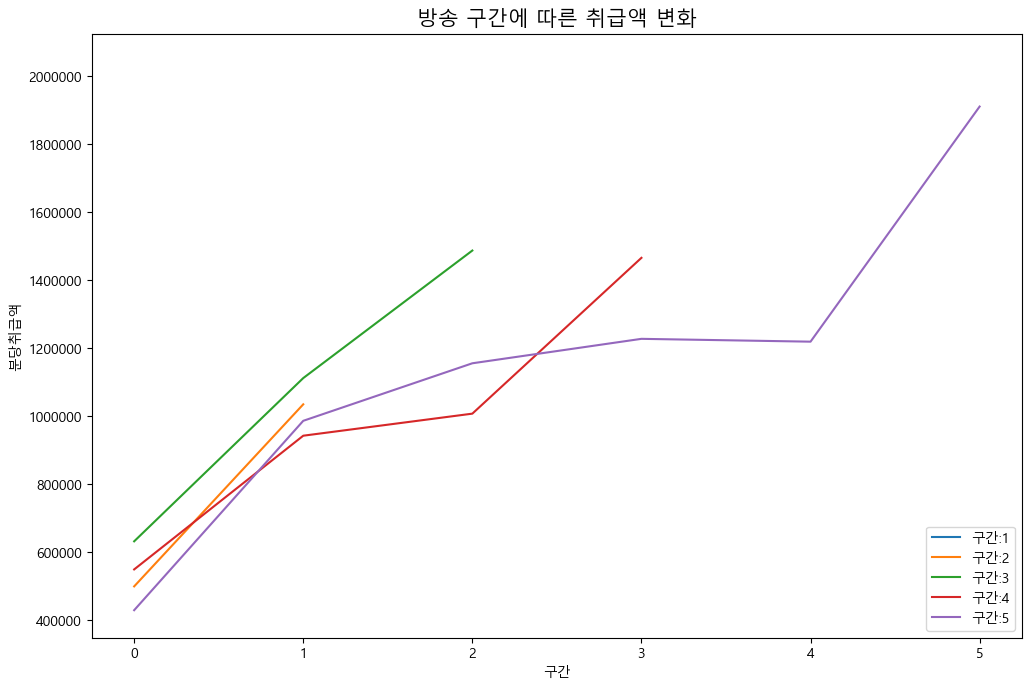

In [ ]:
# for i in [1,2,3,4,6]: # 자체계산하였음. 필요없는 부분.
#     idx_d[i]=tmp[tmp['상품구간개수_분류']==i]['분당취급액'].groupby(by=[tmp[tmp['상품구간개수_분류']==i]['방송상품idx']]).mean()

In [13]:
# 방송순서 가중치 생성
df_=df
df_ = df_.sort_values(by=['방송상품set_idx','방송상품idx'])
money_df = pd.DataFrame(df_['분당취급액'].groupby(by=[df_['방송상품set_idx'], df_['방송상품idx']]).sum())
money_df['방송상품set_idx'] = [i[0] for i in money_df.index]
money_df['방송상품idx'] = [i[1] for i in money_df.index]
money_df.reset_index(drop=True, inplace=True)



# min-max 정규화.
max_money = max(money_df.분당취급액)
min_money = min(money_df.분당취급액)
for i in money_df.index:
    money_df.loc[i,'분당취급액'] = (money_df.loc[i,'분당취급액'] - min_money) / (max_money - min_money)

money_df.sort_values(by=['방송상품set_idx','방송상품idx'], ascending=True, inplace=True)   
money_df.reset_index(drop=True, inplace=True)

length = len(money_df.index)
money_df['상품구간개수_분류'] = 0

basket=[]
for i in  sorted(set(money_df['방송상품set_idx'])):
    answer = max(money_df[money_df['방송상품set_idx']==i]['방송상품idx'])+1
    if answer != len(money_df[money_df['방송상품set_idx']==i]['방송상품idx']):
        basket.extend([answer]*(answer-1)) # 1개
    else:
        basket.extend([answer]*answer)

df_['상품구간개수_분류'] = basket

df_.reset_index(drop=True, inplace=True)




idx_d={}
for i in sorted(set(df_['상품구간개수_분류'])): 
    idx_d[i]=df_[df_['상품구간개수_분류']==i]['분당취급액'].groupby(by=[df_[df_['상품구간개수_분류']==i]['방송상품idx']]).mean()

graph_d=idx_d.copy() # 그래프생성을위한객체

result_d = {}
for i in idx_d: 
    diff_ratio=[]

    for j in idx_d[i].index: # 구간별 gradient 개산

        if len(idx_d[i]) == 1:
            result_d[1] = {0:1}
            print(result_d[i])
        else:
            for k in range(0,len(idx_d[i])-1):
                diff_ratio.append(idx_d[i][k+1]/idx_d[i][k])
        result_d[i]  = {a:b for a,b in zip(list(idx_d[i].index)[:-1], list(diff_ratio)[:-1]) }
result_d[1] = {0:1}     


idx_d={}
for i in sorted(set(df_['상품구간개수_분류'])): 
    idx_d[i]=df_[df_['상품구간개수_분류']==i]['분당취급액'].groupby(by=[df_[df_['상품구간개수_분류']==i]['방송상품idx']]).mean()


basket={}
basket[1] = {0:1}
for i in result_d:

    if i > 1:

        basket[i]={0:1/i}
        dum = 1/i
        for num in result_d[i].keys():
            dum *= result_d[i][num]
            basket[i][num+1] = dum


for i in basket:
    if i > 1:

        s = sum(basket[i].values())
        for j in basket[i].keys():
            basket[i][j]=basket[i][j]/s



idx_d = basket

df_['상품구간_w'] = 0
for i in df_.index:
    df_.loc[i,'상품구간_w'] = idx_d[df_.loc[i,'상품구간개수_분류']][df_.loc[i,'방송상품idx']]


{0: 1}


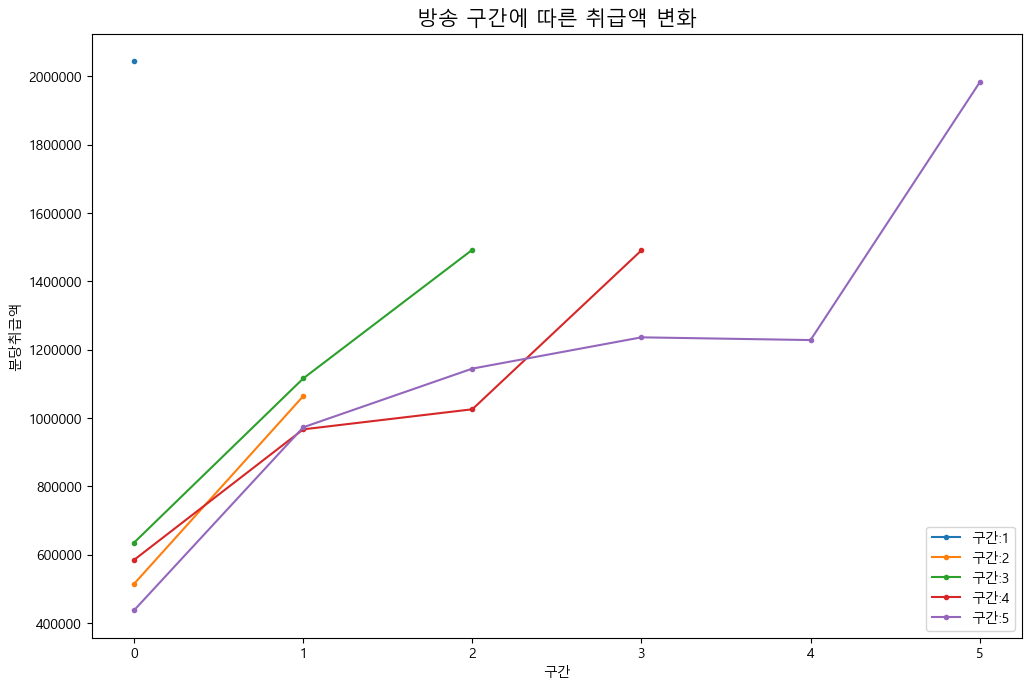

In [24]:
for i in graph_d:
    plt.plot(graph_d[i].keys(), graph_d[i], marker='o',markersize=3)
    plt.title('방송 구간에 따른 취급액 변화', size=15)
    plt.xlabel('구간')
    plt.ylabel('분당취급액')
plt.legend(['구간:1','구간:2','구간:3','구간:4','구간:5'])
plt.savefig(fig_path+'그래프/변수생성/방송구간_w/방송 구간에 따른 취급액 변화.png', dpi=300)